In [45]:
import pandas as pd
df=pd.read_csv("/content/people.csv")
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [46]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [47]:
df1=df

In [48]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
df1["salary"]=l1.fit_transform(df1["salary"])

In [49]:
df["salary"].unique()

array([1, 2, 0])

In [50]:
df1["dept"]=l1.fit_transform(df1["dept"])

In [51]:
df1.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
satisfactoryLevel,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
lastEvaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
numberOfProjects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
avgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
timeSpent.company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotionInLast5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
dept,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


<Axes: >

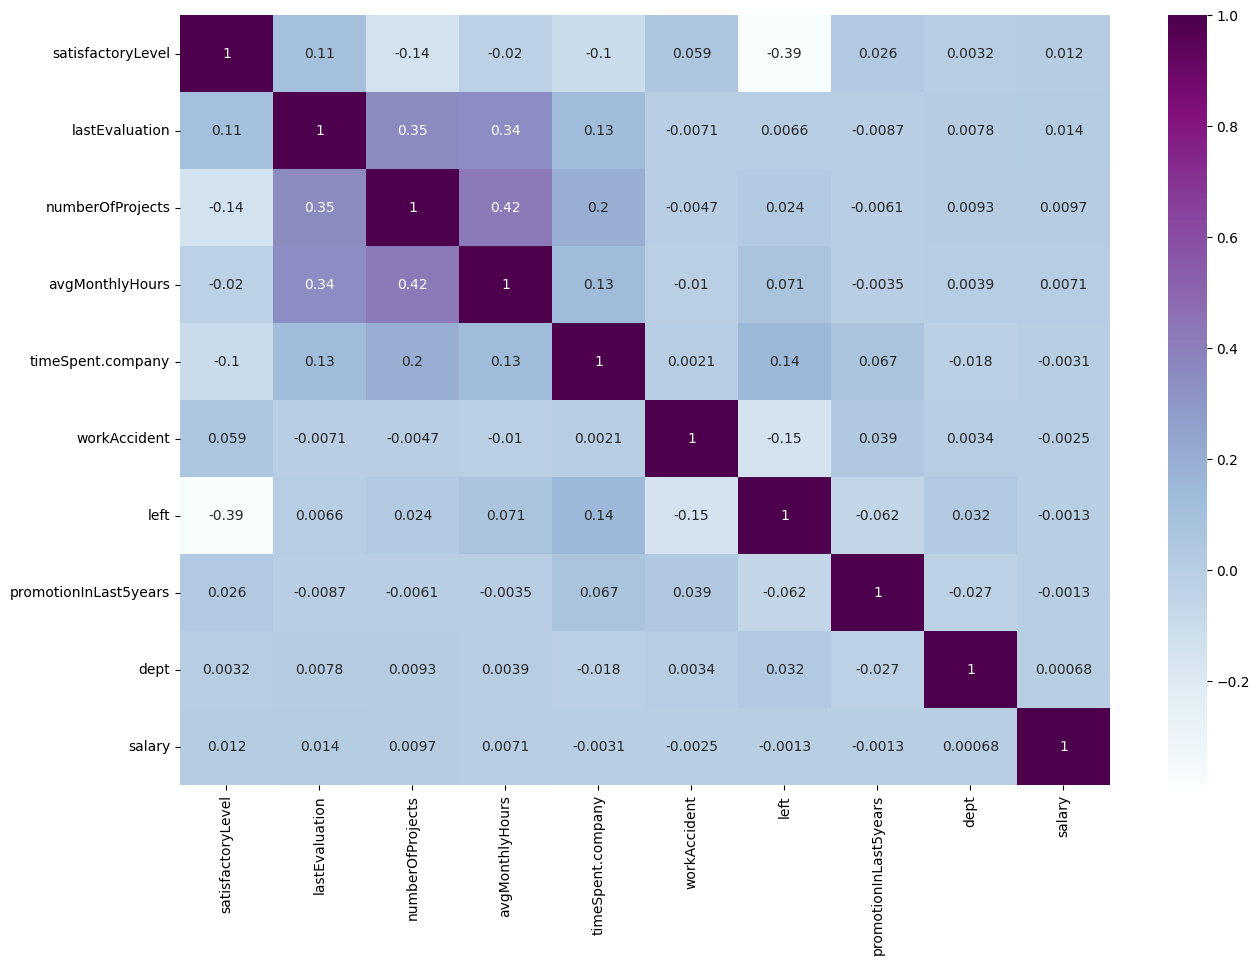

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap="BuPu")

In [53]:
emp=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df["timeSpent.company"]==2)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [54]:
emp.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,8,1
379,0.48,0.78,2,198,2,0,1,0,9,2
413,0.34,0.67,4,141,2,0,1,0,7,1
1239,0.14,0.47,4,175,2,0,1,0,1,2
1426,0.19,0.58,5,182,2,0,0,0,9,2


In [55]:
employee=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df["timeSpent.company"]==3)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [56]:
emp.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,8,1
379,0.48,0.78,2,198,2,0,1,0,9,2
413,0.34,0.67,4,141,2,0,1,0,7,1
1239,0.14,0.47,4,175,2,0,1,0,1,2
1426,0.19,0.58,5,182,2,0,0,0,9,2


In [57]:
employee.shape

(1701, 10)

In [58]:
sample_size=100

In [59]:
sample1=employee.sample(sample_size,random_state=0)

In [60]:
sample1.shape

(100, 10)

In [61]:
sample1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
1765,0.31,0.49,4,165,3,1,0,0,9,1
11,0.38,0.54,2,143,3,0,1,0,7,1
487,0.39,0.52,2,134,3,0,1,0,9,1
10786,0.41,0.53,2,157,3,0,1,0,2,1
6355,0.34,0.49,4,149,3,0,0,0,9,2


In [62]:
from scipy.stats import ttest_1samp

In [63]:
pos_mean=200
statistic,pvalue=ttest_1samp(sample1["avgMonthlyHours"],pos_mean)
print(statistic,pvalue)

-30.69607047604455 2.184059548624263e-52


In [64]:
#degreeof fredom
n=len(emp["avgMonthlyHours"])
dof=n-1
print(n,dof)

251 250


In [65]:
alpha=0.05

In [66]:
from scipy.stats import t

In [67]:
cv=t.ppf([alpha/2,1-alpha/2],dof)
print(cv)

[-1.96949839  1.96949839]


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
from  statsmodels.stats.proportion import proportions_ztest

In [70]:
sample_size=100

In [71]:
sample1=df.sample(sample_size,random_state=0)

In [76]:
count=sample1["left"].value_counts()
count

left
0    78
1    22
Name: count, dtype: int64

In [77]:
nobs=len(sample1["left"])

In [73]:
p0=0.30

In [78]:
statistic_oneprop,pvalue_oneprop=proportions_ztest(count=count,nobs=nobs,value=p0,alternative="two-sided",prop_var=False)

In [79]:
from scipy.stats import norm
cv_norm=norm.ppf([alpha/2,1-alpha/2])
print(cv_norm)

[-1.95996398  1.95996398]


In [80]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [82]:
df1["timeSpent.company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [83]:
df1=df1.rename(columns={"timeSpent.company":"timespent"})

In [95]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,time,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [96]:
e1=df1[(df1.time>=2)&(df1.time<=5)]
e2=df1[(df1.time>=6)&(df1.time<=10)]

In [97]:
e1.head()


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,time,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
5,0.10,0.77,6,247,4,0,1,0,7,1


In [98]:
s1=e1.sample(200,random_state=0)
s2=e2.sample(200,random_state=0)

In [99]:
import scipy

In [100]:
scipy.stats.ttest_ind(s1["avgMonthlyHours"],s2["avgMonthlyHours"])

TtestResult(statistic=-2.504299226029395, pvalue=0.012668570117437074, df=398.0)

In [102]:
from scipy.stats import f
f=s1.avgMonthlyHours.var()/s2.avgMonthlyHours.var()
print(f)

0.9510146318634557


In [104]:
df1=len(s1)-1
df2=len(s2)-1


In [105]:
import scipy.stats

In [107]:
p_value=scipy.stats.f.cdf(f,df1,df2)
print(pvalue)

2.184059548624263e-52
